# DataHacks2020: Science Track

## Exploratory Data Analysis

### Notes:
* Five or more relatied sections from any topic of interest
* NLP on questions
* 2001-2016 time span
* srat cat 2 and 3 are all null
* response is not response its null?, DataValue contains the values
* plotly
  
* Folium-good for: heat maps (cities) prob not 
* geopandas (use this): 
* %matplotlib notebook/inline

* links to how the data was gathered:  
* https://www.cdc.gov/mmwr/pdf/rr/rr6401.pdf  
* https://healthdata.gov/dataset/us-chronic-disease-indicators-cdi  
* https://chronicdata.cdc.gov/Chronic-Disease-Indicators/U-S-Chronic-Disease-Indicators-CDI-/g4ie-h725

### Ideas:
* Take words in a question and predict/classify the topic. Can possibly use outside sources.

Current Plan:
* Analyze npaw (health), use chorpleth chart, plot individual points
* analyze one more topic (or section within these topics) and same two plots
* create an aggregate plot with all data as individual points

* combine the gender and race charts (using the correct data this time)

In [1]:
import numpy as np
import pandas as pd
# import re
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt

In [2]:
raw_data = pd.read_csv('data/U.S._Chronic_Disease_Indicators__CDI_.csv')

In [3]:
raw_data.head()

YearStart  YearEnd LocationAbbr          LocationDesc DataSource    Topic  \
0       2015     2015           US         United States       APIS  Alcohol   
1       2012     2012           DC  District of Columbia       APIS  Alcohol   
2       2012     2012           GU                  Guam       APIS  Alcohol   
3       2012     2012           PR           Puerto Rico       APIS  Alcohol   
4       2012     2012           US         United States       APIS  Alcohol   

                                            Question Response DataValueUnit  \
0  Amount of alcohol excise tax by beverage type ...      NaN             $   
1  Amount of alcohol excise tax by beverage type ...      NaN             $   
2  Amount of alcohol excise tax by beverage type ...      NaN             $   
3  Amount of alcohol excise tax by beverage type ...      NaN             $   
4  Amount of alcohol excise tax by beverage type ...      NaN             $   

  DataValueType        ...        LocationID  TopicID QuestionID  \
0    US Dollars        ...                59      ALC   ALC8_0_2   
1    US Dollars        ...                11      ALC   ALC8_0_1   
2    US Dollars        ...                66      ALC   ALC8_0_1   
3    US Dollars        ...                72      ALC   ALC8_0_1   
4    US Dollars        ...                59      ALC   ALC8_0_1   

  DataValueTypeID  StratificationCategoryID1  StratificationID1  \
0             USD                    OVERALL                OVR   
1             USD                    OVERALL                OVR   
2             USD                    OVERALL                OVR   
3             USD                    OVERALL                OVR   
4             USD                    OVERALL                OVR   

  StratificationCategoryID2 StratificationID2 StratificationCategoryID3  \
0                       NaN               NaN                       NaN   
1                       NaN               NaN                       NaN   
2                       NaN               NaN                       NaN   
3                       NaN               NaN                       NaN   
4                       NaN               NaN                       NaN   

  StratificationID3  
0               NaN  
1               NaN  
2               NaN  
3               NaN  
4               NaN  

[5 rows x 34 columns]

In [4]:
# attributes to note: YearStart/YearEnd, Tpoic, Question, Response, DataValue, Geolocation, StartificationCategory
raw_data.describe()

YearStart        YearEnd  DataValueAlt  LowConfidenceLimit  \
count  519718.000000  519718.000000  3.503350e+05       311062.000000   
mean     2013.141885    2013.162754  8.917742e+02           46.759401   
std         1.777622       1.762672  1.833073e+04           77.492628   
min      2001.000000    2001.000000  0.000000e+00            0.200000   
25%      2012.000000    2012.000000  1.845500e+01           12.700000   
50%      2013.000000    2013.000000  4.100000e+01           30.200000   
75%      2015.000000    2015.000000  7.030000e+01           55.400000   
max      2016.000000    2016.000000  2.600878e+06         1330.660000   

       HighConfidenceLimit     LocationID  
count        311062.000000  519718.000000  
mean             58.991287      30.993144  
std              88.668862      17.723341  
min               0.420000       1.000000  
25%              18.900000      17.000000  
50%              43.800000      30.000000  
75%              70.400000      45.000000  
max            2088.000000      78.000000

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519718 entries, 0 to 519717
Data columns (total 34 columns):
YearStart                    519718 non-null int64
YearEnd                      519718 non-null int64
LocationAbbr                 519718 non-null object
LocationDesc                 519718 non-null object
DataSource                   519718 non-null object
Topic                        519718 non-null object
Question                     519718 non-null object
Response                     79188 non-null object
DataValueUnit                476046 non-null object
DataValueType                519718 non-null object
DataValue                    374564 non-null object
DataValueAlt                 350335 non-null float64
DataValueFootnoteSymbol      227318 non-null object
DatavalueFootnote            227152 non-null object
LowConfidenceLimit           311062 non-null float64
HighConfidenceLimit          311062 non-null float64
StratificationCategory1      519718 non-null object
Strat

Response, ResponseID, Stratification2/3, StratificationID2/3, StratificationCategory2/3, and StratificationCategoryID2/3 all have ~ 79000 non-null, which is suspicious

In [6]:
null_cols = ['Response', 'ResponseID', 'Stratification2', 'Stratification3', 
             'StratificationCategory2', 'StratificationCategory3', 'StratificationID2', 'StratificationID3', 
             'StratificationCategoryID2', 'StratificationCategoryID3']

for col in null_cols:
    print(raw_data[col].value_counts())

     79188
Name: Response, dtype: int64
     79176
Name: ResponseID, dtype: int64
     79188
Name: Stratification2, dtype: int64
     79188
Name: Stratification3, dtype: int64
     79188
Name: StratificationCategory2, dtype: int64
     79188
Name: StratificationCategory3, dtype: int64
     79189
Name: StratificationID2, dtype: int64
     79188
Name: StratificationID3, dtype: int64
     79189
Name: StratificationCategoryID2, dtype: int64
     79188
Name: StratificationCategoryID3, dtype: int64


All of these columns are blank/null, so we can safely remove them.

In [7]:
data = raw_data.drop(null_cols, axis=1)

There is both a Topic and TopicID column, which could be redundant.

In [8]:
data[['Topic', 'TopicID']].groupby('Topic')['TopicID'].nunique()

Topic
Alcohol                                            1
Arthritis                                          1
Asthma                                             1
Cancer                                             1
Cardiovascular Disease                             1
Chronic Kidney Disease                             1
Chronic Obstructive Pulmonary Disease              1
Diabetes                                           1
Disability                                         1
Immunization                                       1
Mental Health                                      1
Nutrition, Physical Activity, and Weight Status    1
Older Adults                                       1
Oral Health                                        1
Overarching Conditions                             1
Reproductive Health                                1
Tobacco                                            1
Name: TopicID, dtype: int64

Indeed, Topic and TopicID are redundant, so we can remove one. In this case, TopicID is mor ambiguous, so we remove it. However, we will keep a map for reference.

In [9]:
TopicIdToTopic = data[['Topic', 'TopicID']].drop_duplicates().set_index('TopicID')
data = data.drop('TopicID', axis=1)

We will now look at the proportion of null values in each of the remaining columns:

In [10]:
data.isna().mean()

YearStart                    0.000000
YearEnd                      0.000000
LocationAbbr                 0.000000
LocationDesc                 0.000000
DataSource                   0.000000
Topic                        0.000000
Question                     0.000000
DataValueUnit                0.084030
DataValueType                0.000000
DataValue                    0.279294
DataValueAlt                 0.325913
DataValueFootnoteSymbol      0.562613
DatavalueFootnote            0.562932
LowConfidenceLimit           0.401479
HighConfidenceLimit          0.401479
StratificationCategory1      0.000000
Stratification1              0.000000
GeoLocation                  0.006933
LocationID                   0.000000
QuestionID                   0.000000
DataValueTypeID              0.000000
StratificationCategoryID1    0.000000
StratificationID1            0.000000
dtype: float64

Let's now look at the topics:

In [11]:
(data.DataValue=='Yes').sum()

294

In [12]:
data.Topic.value_counts(normalize=True)

Diabetes                                           0.153220
Chronic Obstructive Pulmonary Disease              0.151484
Cardiovascular Disease                             0.145823
Arthritis                                          0.080361
Overarching Conditions                             0.075737
Asthma                                             0.075543
Nutrition, Physical Activity, and Weight Status    0.064691
Alcohol                                            0.061283
Tobacco                                            0.056388
Older Adults                                       0.029439
Cancer                                             0.027132
Chronic Kidney Disease                             0.023849
Oral Health                                        0.021429
Mental Health                                      0.013902
Immunization                                       0.010044
Disability                                         0.005711
Reproductive Health                     

There is the most data for Diabetes, so we'll explore it first.

In [13]:
diabetes = data.loc[data.Topic=='Diabetes']
diabetes.head()

YearStart  YearEnd LocationAbbr LocationDesc DataSource     Topic  \
258       2012     2012           IL     Illinois      BRFSS  Diabetes   
262       2011     2011           IL     Illinois      BRFSS  Diabetes   
276       2010     2010           AK       Alaska       NVSS  Diabetes   
303       2011     2011           KS       Kansas       NVSS  Diabetes   
308       2016     2016           FL      Florida      BRFSS  Diabetes   

                                              Question      DataValueUnit  \
258  Foot examination among adults aged >= 18 years...                  %   
262  Foot examination among adults aged >= 18 years...                  %   
276  Mortality due to diabetes reported as any list...  cases per 100,000   
303  Mortality with diabetic ketoacidosis reported ...                NaN   
308  Influenza vaccination among noninstitutionaliz...                  %   

               DataValueType DataValue        ...         LowConfidenceLimit  \
258  Age-adjusted Prevalence       NaN        ...                        NaN   
262         Crude Prevalence       NaN        ...                        NaN   
276        Age-adjusted Rate      51.9        ...                       42.1   
303                   Number        27        ...                        NaN   
308         Crude Prevalence        48        ...                       42.9   

    HighConfidenceLimit StratificationCategory1      Stratification1  \
258                 NaN                  Gender                 Male   
262                 NaN                  Gender                 Male   
276                61.7                  Gender               Female   
303                 NaN                 Overall              Overall   
308                53.2          Race/Ethnicity  White, non-Hispanic   

                           GeoLocation LocationID QuestionID DataValueTypeID  \
258      (40.485010283, -88.997710178)         17     DIA5_0      AGEADJPREV   
262      (40.485010283, -88.997710178)         17     DIA5_0         CRDPREV   
276  (64.845079957001, -147.722059036)          2     DIA1_1      AGEADJRATE   
303        (38.3477403, -98.200781227)         20     DIA1_2            NMBR   
308      (28.932040377, -81.928960539)         12    DIA12_1         CRDPREV   

     StratificationCategoryID1 StratificationID1  
258                     GENDER              GENM  
262                     GENDER              GENM  
276                     GENDER              GENF  
303                    OVERALL               OVR  
308                       RACE               WHT  

[5 rows x 23 columns]

In [14]:
diabetes.iloc[123]

YearStart                                                                 2016
YearEnd                                                                   2016
LocationAbbr                                                                GA
LocationDesc                                                           Georgia
DataSource                                                               BRFSS
Topic                                                                 Diabetes
Question                     Dilated eye examination among adults aged >= 1...
DataValueUnit                                                                %
DataValueType                                          Age-adjusted Prevalence
DataValue                                                                  NaN
DataValueAlt                                                               NaN
DataValueFootnoteSymbol                                                      -
DatavalueFootnote                                   

In [15]:
diabetes.Question.value_counts()

Mortality due to diabetes reported as any listed cause of death                                        6135
Mortality with diabetic ketoacidosis reported as any listed cause of death                             6135
Foot examination among adults aged >= 18 years with diagnosed diabetes                                 5220
Prevalence of depressive disorders among adults aged >= 18 years with diagnosed diabetes               5220
Pneumococcal vaccination among noninstitutionalized adults aged 18-64 years with diagnosed diabetes    5220
Influenza vaccination among noninstitutionalized adults aged 18-64 years with diagnosed diabetes       5220
Glycosylated hemoglobin measurement among adults aged >= 18 years with diagnosed diabetes              5220
Dilated eye examination among adults aged >= 18 years with diagnosed diabetes                          5220
Influenza vaccination among noninstitutionalized adults aged >= 65 years with diagnosed diabetes       5220
Adults with diagnosed diabet

In [16]:
diabetes.loc[diabetes.Question=='Mortality due to diabetes reported as any listed cause of death']

YearStart  YearEnd LocationAbbr          LocationDesc DataSource  \
276          2010     2010           AK                Alaska       NVSS   
366          2010     2010           AR              Arkansas       NVSS   
422          2012     2012           WV         West Virginia       NVSS   
444          2014     2014           AL               Alabama       NVSS   
472          2010     2010           WY               Wyoming       NVSS   
482          2011     2011           FL               Florida       NVSS   
712          2012     2012           CO              Colorado       NVSS   
785          2013     2013           MS           Mississippi       NVSS   
907          2014     2014           AK                Alaska       NVSS   
977          2012     2012           OH                  Ohio       NVSS   
1078         2010     2010           AK                Alaska       NVSS   
1085         2014     2014           CO              Colorado       NVSS   
1171         2012     2012           AZ               Arizona       NVSS   
1297         2013     2013           ND          North Dakota       NVSS   
1316         2011     2011           DC  District of Columbia       NVSS   
1328         2011     2011           MA         Massachusetts       NVSS   
1457         2011     2011           WY               Wyoming       NVSS   
1577         2014     2014           WA            Washington       NVSS   
1616         2013     2013           CA            California       NVSS   
1651         2012     2012           SC        South Carolina       NVSS   
2130         2014     2014           RI          Rhode Island       NVSS   
2159         2010     2010           DE              Delaware       NVSS   
2197         2011     2011           CA            California       NVSS   
2209         2010     2010           CO              Colorado       NVSS   
2389         2010     2010           MN             Minnesota       NVSS   
2390         2010     2010           MA         Massachusetts       NVSS   
2543         2011     2011           AR              Arkansas       NVSS   
2586         2014     2014           IN               Indiana       NVSS   
2601         2011     2011           MO              Missouri       NVSS   
2704         2014     2014           CO              Colorado       NVSS   
...           ...      ...          ...                   ...        ...   
517149       2014     2014           VT               Vermont       NVSS   
517200       2012     2012           WI             Wisconsin       NVSS   
517314       2013     2013           MT               Montana       NVSS   
517428       2012     2012           KS                Kansas       NVSS   
517447       2011     2011           MT               Montana       NVSS   
517505       2014     2014           MS           Mississippi       NVSS   
517723       2012     2012           AZ               Arizona       NVSS   
517762       2013     2013           NV                Nevada       NVSS   
517773       2014     2014           NM            New Mexico       NVSS   
518016       2012     2012           VA              Virginia       NVSS   
518097       2014     2014           KY              Kentucky       NVSS   
518111       2012     2012           ME                 Maine       NVSS   
518160       2014     2014           UT                  Utah       NVSS   
518176       2013     2013           AR              Arkansas       NVSS   
518185       2013     2013           IL              Illinois       NVSS   
518291       2011     2011           SD          South Dakota       NVSS   
518327       2011     2011           MS           Mississippi       NVSS   
518330       2012     2012           MN             Minnesota       NVSS   
518353       2013     2013           US         United States       NVSS   
518453       2013     2013           SD          South Dakota       NVSS   
518503       2010     2010           RI          Rhode I

In [17]:
# diabetes.loc[diabetes.Question=='Mortality with diabetic ketoacidosis reported as any listed cause of death']
diabetes.loc[diabetes.QuestionID=='DIA1_1'].groupby('Stratification1').mean()

YearStart  YearEnd  DataValueAlt  \
Stratification1                                                      
American Indian or Alaska Native     2012.0   2012.0    117.125076   
Asian or Pacific Islander            2012.0   2012.0    105.904524   
Black, non-Hispanic                  2012.0   2012.0    364.989833   
Female                               2012.0   2012.0    723.739216   
Hispanic                             2012.0   2012.0    217.790451   
Male                                 2012.0   2012.0    810.758431   
Overall                              2012.0   2012.0   2858.066154   
White, non-Hispanic                  2012.0   2012.0   1185.783529   

                                  LowConfidenceLimit  HighConfidenceLimit  \
Stratification1                                                             
American Indian or Alaska Native           94.767431           165.504128   
Asian or Pacific Islander                  30.662500            50.707143   
Black, non-Hispanic                        89.316500           111.840750   
Female                                     63.359020            71.746078   
Hispanic                                   37.609115            56.425260   
Male                                       82.541373            92.861961   
Overall                                    73.468654            79.885385   
White, non-Hispanic                        70.259412            77.284118   

                                  LocationID  
Stratification1                               
American Indian or Alaska Native   28.960784  
Asian or Pacific Islander          28.960784  
Black, non-Hispanic                28.960784  
Female                             28.960784  
Hispanic                           28.960784  
Male                               28.960784  
Overall                            29.538462  
White, non-Hispanic                28.960784

It appears that each question corresponds to its own QuestionID.  
For example, DIA1_1 corresponse to : 'Mortality due to diabetes reported as any listed cause of death'

## Visualizations

### Visualization 1: Diabetes mortality rate by race

In [18]:
# we want the mortality rate, so select cases per 100,000
diab_mortality = diabetes.loc[
    (diabetes.QuestionID=='DIA1_1') & 
    (diabetes.DataValueUnit=='cases per 100,000')

]

In [19]:
diab_mortality.sort_values(['LocationAbbr', 'YearStart', 'DataValueType'])

YearStart  YearEnd LocationAbbr LocationDesc DataSource     Topic  \
276          2010     2010           AK       Alaska       NVSS  Diabetes   
32677        2010     2010           AK       Alaska       NVSS  Diabetes   
137074       2010     2010           AK       Alaska       NVSS  Diabetes   
226286       2010     2010           AK       Alaska       NVSS  Diabetes   
289294       2010     2010           AK       Alaska       NVSS  Diabetes   
345852       2010     2010           AK       Alaska       NVSS  Diabetes   
473377       2010     2010           AK       Alaska       NVSS  Diabetes   
491205       2010     2010           AK       Alaska       NVSS  Diabetes   
1078         2010     2010           AK       Alaska       NVSS  Diabetes   
186662       2010     2010           AK       Alaska       NVSS  Diabetes   
193249       2010     2010           AK       Alaska       NVSS  Diabetes   
208502       2010     2010           AK       Alaska       NVSS  Diabetes   
288956       2010     2010           AK       Alaska       NVSS  Diabetes   
341917       2010     2010           AK       Alaska       NVSS  Diabetes   
435565       2010     2010           AK       Alaska       NVSS  Diabetes   
439817       2010     2010           AK       Alaska       NVSS  Diabetes   
131287       2011     2011           AK       Alaska       NVSS  Diabetes   
176927       2011     2011           AK       Alaska       NVSS  Diabetes   
271616       2011     2011           AK       Alaska       NVSS  Diabetes   
329383       2011     2011           AK       Alaska       NVSS  Diabetes   
333711       2011     2011           AK       Alaska       NVSS  Diabetes   
342900       2011     2011           AK       Alaska       NVSS  Diabetes   
418061       2011     2011           AK       Alaska       NVSS  Diabetes   
421442       2011     2011           AK       Alaska       NVSS  Diabetes   
65732        2011     2011           AK       Alaska       NVSS  Diabetes   
103148       2011     2011           AK       Alaska       NVSS  Diabetes   
163210       2011     2011           AK       Alaska       NVSS  Diabetes   
163466       2011     2011           AK       Alaska       NVSS  Diabetes   
281674       2011     2011           AK       Alaska       NVSS  Diabetes   
315694       2011     2011           AK       Alaska       NVSS  Diabetes   
...           ...      ...          ...          ...        ...       ...   
264867       2013     2013           WY      Wyoming       NVSS  Diabetes   
346157       2013     2013           WY      Wyoming       NVSS  Diabetes   
367365       2013     2013           WY      Wyoming       NVSS  Diabetes   
392140       2013     2013           WY      Wyoming       NVSS  Diabetes   
404441       2013     2013           WY      Wyoming       NVSS  Diabetes   
459539       2013     2013           WY      Wyoming       NVSS  Diabetes   
68966        2013     2013           WY      Wyoming       NVSS  Diabetes   
89587        2013     2013           WY      Wyoming       NVSS  Diabetes   
125294       2013     2013           WY      Wyoming       NVSS  Diabetes   
271412       2013     2013           WY      Wyoming       NVSS  Diabetes   
349696       2013     2013           WY      Wyoming       NVSS  Diabetes   
358555       2013     2013           WY      Wyoming       NVSS  Diabetes   
464007       2013     2013           WY      Wyoming       NVSS  Diabetes   
492001       2013     2013           WY      Wyoming       NVSS  Diabetes   
54470        2014     2014           WY      Wyoming       NVSS  Diabetes   
155400       2014     2014           WY      Wyoming       NVSS  Diabetes   
159674       2014     2014           WY      Wyoming       NVSS  Diabetes   
174494       2014     2014           WY      Wyoming       NVSS  Diabetes   
207229       2014     2014           WY      Wyoming       NVSS  Diabetes   
211445       2014     2014           WY      Wyoming       NVSS  Diabetes   
2242

Now, all DataValues are cases per 100,000

In [20]:
# select the stratification and datavalue columns, then rename them
diab_gender_mortality = diab_mortality.loc[diab_mortality.StratificationCategory1=='Gender']
diab_gender_mortality = diab_gender_mortality[['Stratification1', 'DataValue']].rename(
    columns={'Stratification1':'Gender', 'DataValue':'Mortality Rate (per 100,000)'}
)

In [21]:
# currently, Mortality Rate is a string, so convert it to a float
diab_gender_mortality = diab_gender_mortality.astype({'Mortality Rate (per 100,000)': 'float64'})

In [22]:
diab_gender_mortality

Gender  Mortality Rate (per 100,000)
276     Female                          51.9
977     Female                          77.1
1078    Female                          36.4
1577    Female                          76.4
2159    Female                          62.7
2197      Male                          93.9
2704      Male                          66.1
3901      Male                          74.0
3969      Male                          85.2
5360    Female                          78.5
6257    Female                          58.7
6300      Male                          76.9
6466      Male                          80.7
6499      Male                          72.8
6599    Female                          77.6
7041    Female                          59.8
7043    Female                          70.6
7519      Male                          68.1
8482    Female                          51.1
9704    Female                          56.2
10693     Male                          80.9
11107   Female                          67.8
11679   Female                          61.5
12167     Male                          92.9
12382   Female                          59.8
13264     Male                         100.5
13356   Female                         106.4
13426   Female                          36.7
13672     Male                         120.9
13716   Female                          54.4
...        ...                           ...
506880    Male                          96.7
507136  Female                          81.7
508278    Male                          65.3
508634  Female                          82.4
510036  Female                          62.6
510040  Female                          58.2
510211    Male                          52.6
510917  Female                          78.2
511481    Male                         111.2
511631  Female                          76.6
512324    Male                          92.1
512386  Female                          94.7
512672  Female                          67.8
513405    Male                         124.7
514054  Female                          57.4
515389    Male                         139.9
515421    Male                          88.4
515804    Male                          98.4
515825  Female                          92.4
516245    Male                          91.9
516448    Male                         105.3
516912  Female                         120.5
517105  Female                          50.0
517314  Female                          69.1
517723  Female                          62.0
518097    Male                         111.3
518503  Female                          84.3
519053    Male                          58.9
519138  Female                          74.4
519528  Female                          67.0

[1020 rows x 2 columns]

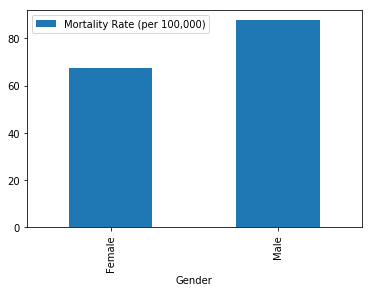

In [23]:
diab_gender_mortality.groupby('Gender').mean().plot.bar()

### Visualization 2: Diabetes mortality by race

In [24]:
diab_race_mortality = diabetes.loc[
    (diabetes.QuestionID=='DIA1_1') & 
    (diabetes.StratificationCategoryID1=='RACE') &
    (diabetes.DataValueUnit=='cases per 100,000') &
    (diab_mortality.DataValueTypeID=='CRDRATE')
]
diab_race_mortality.head(2)

YearStart  YearEnd LocationAbbr   LocationDesc DataSource     Topic  \
422        2012     2012           WV  West Virginia       NVSS  Diabetes   
1171       2012     2012           AZ        Arizona       NVSS  Diabetes   

                                               Question      DataValueUnit  \
422   Mortality due to diabetes reported as any list...  cases per 100,000   
1171  Mortality due to diabetes reported as any list...  cases per 100,000   

     DataValueType DataValue        ...         LowConfidenceLimit  \
422     Crude Rate                  ...                        NaN   
1171    Crude Rate      72.4        ...                       69.7   

     HighConfidenceLimit StratificationCategory1      Stratification1  \
422                  NaN          Race/Ethnicity             Hispanic   
1171                75.1          Race/Ethnicity  White, non-Hispanic   

                        GeoLocation LocationID QuestionID DataValueTypeID  \
422   (38.665510202, -80.712640135)         54     DIA1_1         CRDRATE   
1171  (34.86597028, -111.763811277)          4     DIA1_1         CRDRATE   

      StratificationCategoryID1 StratificationID1  
422                        RACE               HIS  
1171                       RACE               WHT  

[2 rows x 23 columns]

We will again assume that all DataValues are cases per 100,000

In [25]:
# select the stratification and datavalue columns, then rename them
diab_race_mortality = diab_race_mortality[['Stratification1', 'DataValue']].rename(
    columns={'Stratification1':'Race', 'DataValue':'Mortality Rate (per 100,000)'}
)

In [26]:
diab_race_mortality.head()

Race Mortality Rate (per 100,000)
422              Hispanic                             
1171  White, non-Hispanic                         72.4
1316  Black, non-Hispanic                        163.2
2130             Hispanic                         20.3
2586             Hispanic                         25.4

We will now remove blank values

In [27]:
# strips whitespaces and removes blanks
diab_race_mortality = diab_race_mortality[(diab_race_mortality['Mortality Rate (per 100,000)'].str.strip() != '')]

In [28]:
# currently, Mortality Rate is a string, so convert it to a float
diab_race_mortality = diab_race_mortality.astype({'Mortality Rate (per 100,000)': 'float64'})

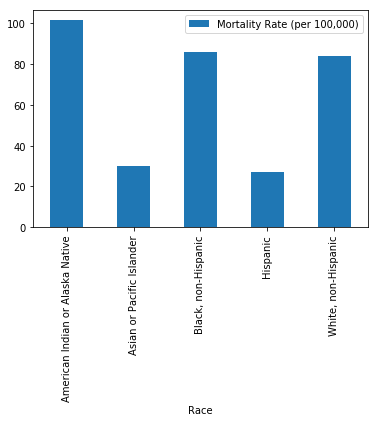

In [29]:
diab_race_mortality.groupby('Race').mean().plot.bar()

Let's plot the average too.

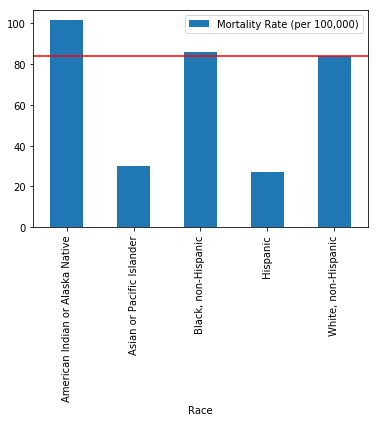

In [30]:
us_mean_mortality = diab_mortality[
    (diab_mortality.Stratification1=='Overall') &
    (diab_mortality.LocationAbbr=='US') &
    (diab_mortality.DataValueTypeID=='CRDRATE')
].DataValueAlt.mean()
diab_race_mortality.groupby('Race').mean().plot.bar()
plt.axhline(y=us_mean_mortality, color='red')

Interestingly, the mortality rate for Natives is highest.  
Let's take a look at this demographic.

In [31]:
diab_race_mortality.groupby('Race').describe()

Mortality Rate (per 100,000)              \
                                                        count        mean   
Race                                                                        
American Indian or Alaska Native                        109.0  101.467890   
Asian or Pacific Islander                               140.0   30.166429   
Black, non-Hispanic                                     200.0   85.589500   
Hispanic                                                192.0   26.916667   
White, non-Hispanic                                     255.0   83.725490   

                                                                           \
                                        std   min     25%    50%      75%   
Race                                                                        
American Indian or Alaska Native  36.069100  29.5  82.100  107.9  121.900   
Asian or Pacific Islander         15.371484   9.7  20.950   25.7   33.525   
Black, non-Hispanic               22.989177  33.1  69.875   82.7   98.250   
Hispanic                          14.646617   6.5  15.800   23.7   35.800   
White, non-Hispanic               22.136826  16.6  72.050   82.6   97.900   

                                         
                                    max  
Race                                     
American Indian or Alaska Native  208.1  
Asian or Pacific Islander          82.4  
Black, non-Hispanic               163.2  
Hispanic                           74.6  
White, non-Hispanic               147.2

In [32]:
# TODO, continue analysis?

### Visualization 3: Diabetes mortality by geographical location

In [33]:
# we care more about proportion than count, so select cases per 100,000
diab_mortality = diabetes.loc[(diabetes.QuestionID=='DIA1_1') & (diabetes.DataValueUnit=='cases per 100,000')]

In [34]:
diab_overall = diab_mortality[diab_mortality.Stratification1=='Overall']
# diab_overall # choropleth map it such that countries higher than average diabetes rates are red, and opposite is blue/green

For a more fair comparison, we will use the Age-adjusted Rate to compare states. We must also remove the US and Washington D.C. averages. Keep the US average for reference.

In [35]:
diab_overall = diab_overall[diab_overall.DataValueTypeID=='AGEADJRATE']

In [36]:
# remove blank data values to convert to float and rename
diab_overall = diab_overall[(diab_overall['DataValue'].str.strip() != '')].rename(
    columns={'DataValue':'Mortality Rate (per 100,000)'}
)


# convert data values to float
diab_overall = diab_overall.astype({'Mortality Rate (per 100,000)': 'float64'})

In [37]:
# get US average
mean_US_diab_mortality = diab_overall[diab_overall.LocationAbbr=='US']['Mortality Rate (per 100,000)'].mean()

Lets then separate the overall diabetes rate by state:

In [38]:
# separate geological data by state, and remove all states (US) and washington D.C. (DC)
by_state = diab_overall.loc[(diab_overall.LocationAbbr!='US') & (diab_overall.LocationAbbr!='DC')].groupby(
    'LocationAbbr').mean()

In [39]:
# create choropleth chart
diab_fig_adj = go.Figure(data=go.Choropleth(
    locations=by_state.index, # Spatial coordinates
    z = by_state['Mortality Rate (per 100,000)'], # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'rdbu_r',
    zmid = mean_US_diab_mortality, # middle color = US average
    colorbar_title = "Mortality Rate per 100,000",
    marker_line_color='white' # state borders
))
# 
diab_fig_adj.update_layout(
    title_text = ('Adjusted Average Diabetes Mortality Rate by State (2010-2014)<br>US Average: '
                  + str(round(mean_US_diab_mortality, 2))
                 ),
    geo_scope='usa', # limite map scope to USA
)

We can see that Oklahoma and West Virginia have notably high mortality rates. Let's repeat the process using the crude values to compare.

In [40]:
# same process

diab_overall = diab_mortality[diab_mortality.Stratification1=='Overall']

# this time, select crude rate
diab_overall = diab_overall[diab_overall.DataValueTypeID=='CRDRATE']

# remove blank data values to convert to float and rename
diab_overall = diab_overall[(diab_overall['DataValue'].str.strip() != '')].rename(
    columns={'DataValue':'Mortality Rate (per 100,000)'}
)


# convert data values to float
diab_overall = diab_overall.astype({'Mortality Rate (per 100,000)': 'float64'})

# get US average
mean_US_diab_mortality = diab_overall[diab_overall.LocationAbbr=='US']['Mortality Rate (per 100,000)'].mean()

# separate geological data by state, and remove all states (US) and washington D.C. (DC)
by_state = diab_overall.loc[(diab_overall.LocationAbbr!='US') & (diab_overall.LocationAbbr!='DC')].groupby(
    'LocationAbbr').mean()

# create choropleth chart
diab_fig_crd = go.Figure(data=go.Choropleth(
    locations=by_state.index, # Spatial coordinates
    z = by_state['Mortality Rate (per 100,000)'], # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'rdbu_r',
    zmid = mean_US_diab_mortality, # middle color = US average
    colorbar_title = "Mortality Rate per 100,000",
    marker_line_color='white' # state borders
))
# 
diab_fig_crd.update_layout(
    title_text = ('Crude Average Diabetes Mortality Rate by State (2010-2014)<br>US Average: '
                  + str(round(mean_US_diab_mortality, 2))
                 ),
    geo_scope='usa', # limite map scope to USA
)

In [41]:
# display both figures
diab_fig_adj.show()
diab_fig_crd.show()

In both of these figures, Oklahoma and West Virginia have significantly higher diabetes mortality rates.  
Let's explore some potential causes.

## Exploratory Data Analysis: Nutrition, Physical Activity, and Weight Status

Supposedly, inactive and overweight individuals are more likely to develop type 2 diabetes. Let's see how this relates to each state's diabetes mortality rate.

In [42]:
npaw = data[data.Topic == 'Nutrition, Physical Activity, and Weight Status']

In [43]:
# once again, proportion matters more than count, so select percentages (%)
npaw = npaw[(npaw.QuestionID=='NPAW1_1') & (npaw.DataValueUnit=='%')]
npaw_overall = npaw[npaw.Stratification1=='Overall']

For a more fair comparison, we will use the Age-adjusted Rate to compare states. We must also remove the US and Washington D.C. averages. Keep the US average for reference.

In [44]:
npaw_overall = npaw_overall[npaw_overall.DataValueTypeID=='AGEADJPREV']

In [45]:
# remove blank data values to convert to float and rename
npaw_overall = npaw_overall[(npaw_overall['DataValue'].str.strip() != '')].rename(
    columns={'DataValue':'Obesity Prevalence'}
)


# convert data values to float
npaw_overall = npaw_overall.astype({'Obesity Prevalence': 'float64'})

In [46]:
npaw_overall.YearStart.value_counts()

2016    55
2015    55
2014    55
2013    55
2012    55
2011    55
Name: YearStart, dtype: int64

In [47]:
# get US average
mean_US_Obesity = npaw_overall[npaw_overall.LocationAbbr=='US']['Obesity Prevalence'].mean()

Lets then separate the overall obesity rate by state:

In [48]:
# separate geological data by state, and remove all states (US) and washington D.C. (DC)
by_state = npaw_overall.loc[(npaw_overall.LocationAbbr!='US') & (npaw_overall.LocationAbbr!='DC')].groupby(
    'LocationAbbr').mean()

In [49]:
# create choropleth chart
npaw_fig_adj = go.Figure(data=go.Choropleth(
    locations=by_state.index, # Spatial coordinates
    z = by_state['Obesity Prevalence'], # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'rdbu_r',
    zmid = mean_US_Obesity, # middle color = US average
    colorbar_title = "Obesity Prevalence (%)",
    marker_line_color='white' # state borders
))
# 
npaw_fig_adj.update_layout(
    title_text = ('Adjusted Obesity Prevalence by State (2011-2016)<br>US Obesity Prevalence: '
                  + str(round(mean_US_Obesity, 2) ) + '%'
                 ),
    geo_scope='usa', # limite map scope to USA
)

In [50]:
# repeat process for crude prevalence 

npaw_overall = npaw[npaw.Stratification1=='Overall']

npaw_overall = npaw_overall[npaw_overall.DataValueTypeID=='CRDPREV']

# remove blank data values to convert to float and rename
npaw_overall = npaw_overall[(npaw_overall['DataValue'].str.strip() != '')].rename(
    columns={'DataValue':'Obesity Prevalence'}
)


# convert data values to float
npaw_overall = npaw_overall.astype({'Obesity Prevalence': 'float64'})

npaw_overall.YearStart.value_counts()

# get US average
mean_US_Obesity = npaw_overall[npaw_overall.LocationAbbr=='US']['Obesity Prevalence'].mean()


# separate geological data by state, and remove all states (US) and washington D.C. (DC)
by_state = npaw_overall.loc[(npaw_overall.LocationAbbr!='US') & (npaw_overall.LocationAbbr!='DC')].groupby(
    'LocationAbbr').mean()

# create choropleth chart
npaw_fig_crd = go.Figure(data=go.Choropleth(
    locations=by_state.index, # Spatial coordinates
    z = by_state['Obesity Prevalence'], # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'rdbu_r',
    zmid = mean_US_Obesity, # middle color = US average
    colorbar_title = "Obesity Prevalence (%)",
    marker_line_color='white' # state borders
))
# 
npaw_fig_crd.update_layout(
    title_text = ('Crude Obesity Prevalence by State (2011-2016)<br>US Obesity Prevalence: '
                  + str(round(mean_US_Obesity, 2)) + '%'
                 ),
    geo_scope='usa', # limite map scope to USA
)

In [51]:
npaw_fig_adj.show()
npaw_fig_crd.show()

The two figures are nearly identical. Both Oklahoma and West Virginia have high obesity prevalence, which suggests that there is a correlation between state obesity prevalence and state diabetes mortality.

## Exploratory Data Analysis: Cardiovascular Disease

Similarly to diabetes, inactive and overweight individuals are more likely to develop cardiovascular disease. Let's see how this relates to each state's diabetes mortality rate.

In [52]:
cvd = data[data.Topic=='Cardiovascular Disease']

In [53]:
# examine some questions
cvd.Question.drop_duplicates()

255     Hospitalization for heart failure among Medica...
263                          Mortality from heart failure
268       Hospitalization for acute myocardial infarction
280                            Hospitalization for stroke
284     High cholesterol prevalence among adults aged ...
286     Cholesterol screening among adults aged >= 18 ...
292          Mortality from total cardiovascular diseases
338                  Mortality from diseases of the heart
401     Taking medicine for high blood pressure contro...
439       Mortality from cerebrovascular disease (stroke)
498                 Mortality from coronary heart disease
539     Awareness of high blood pressure among adults ...
579     Influenza vaccination among noninstitutionaliz...
1019    Pneumococcal vaccination among noninstitutiona...
1047    Pneumococcal vaccination among noninstitutiona...
1094    Influenza vaccination among noninstitutionaliz...
2154    Awareness of high blood pressure among women a...
2959          

In [54]:
cvd_overall = cvd[
    (cvd.QuestionID=='CVD1_1') & # total heart disease mortality
    (cvd.DataValueUnit=='cases per 100,000') & # proportion rather than count
    (cvd.Stratification1=='Overall')
]

In [55]:
cvd_overall = cvd_overall[cvd_overall.DataValueTypeID=='AGEADJRATE']

In [56]:
# remove blank data values to convert to float and rename
cvd_overall = cvd_overall[(cvd_overall['DataValue'].str.strip() != '')].rename(
    columns={'DataValue':'Mortality Rate (per 100,000)'}
)


# convert data values to float
cvd_overall = cvd_overall.astype({'Mortality Rate (per 100,000)': 'float64'})

In [57]:
# get US average
mean_US_cvd_mortality = cvd_overall[cvd_overall.LocationAbbr=='US']['Mortality Rate (per 100,000)'].mean()

Lets then separate the overall cvdetes rate by state:

In [58]:
# separate geological data by state, and remove all states (US) and washington D.C. (DC)
by_state = cvd_overall.loc[(cvd_overall.LocationAbbr!='US') & (cvd_overall.LocationAbbr!='DC')].groupby(
    'LocationAbbr').mean()

In [59]:
# create choropleth chart
cvd_fig_adj = go.Figure(data=go.Choropleth(
    locations=by_state.index, # Spatial coordinates
    z = by_state['Mortality Rate (per 100,000)'], # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'rdbu_r',
    zmid = mean_US_cvd_mortality, # middle color = US average
    colorbar_title = "Mortality Rate per 100,000",
    marker_line_color='white' # state borders
))
# 
cvd_fig_adj.update_layout(
    title_text = ('Adjusted Average Cardiovascular Disease Mortality Rate by State (2010-2014)<br>US Average: '
                  + str(round(mean_US_cvd_mortality, 2))
                 ),
    geo_scope='usa', # limite map scope to USA
)

In [60]:
cvd_overall = cvd[
    (cvd.QuestionID=='CVD1_1') & # total heart disease mortality
    (cvd.DataValueUnit=='cases per 100,000') & # proportion rather than count
    (cvd.Stratification1=='Overall')
]

cvd_overall = cvd_overall[cvd_overall.DataValueTypeID=='CRDRATE']

# remove blank data values to convert to float and rename
cvd_overall = cvd_overall[(cvd_overall['DataValue'].str.strip() != '')].rename(
    columns={'DataValue':'Mortality Rate (per 100,000)'}
)


# convert data values to float
cvd_overall = cvd_overall.astype({'Mortality Rate (per 100,000)': 'float64'})

# get US average
mean_US_cvd_mortality = cvd_overall[cvd_overall.LocationAbbr=='US']['Mortality Rate (per 100,000)'].mean()

# separate geological data by state, and remove all states (US) and washington D.C. (DC)
by_state = cvd_overall.loc[(cvd_overall.LocationAbbr!='US') & (cvd_overall.LocationAbbr!='DC')].groupby(
    'LocationAbbr').mean()

# create choropleth chart
cvd_fig_crd = go.Figure(data=go.Choropleth(
    locations=by_state.index, # Spatial coordinates
    z = by_state['Mortality Rate (per 100,000)'], # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'rdbu_r',
    zmid = mean_US_cvd_mortality, # middle color = US average
    colorbar_title = "Mortality Rate per 100,000",
    marker_line_color='white' # state borders
))
# 
cvd_fig_crd.update_layout(
    title_text = ('Crude Average Cardiovascular Disease Mortality Rate by State (2010-2014)<br>US Average: '
                  + str(round(mean_US_cvd_mortality, 2))
                 ),
    geo_scope='usa', # limite map scope to USA
)

While not the worst, once again, Oklahoma and West Virginia have fairly high mortality rates for cardiovascular disease.

## Permutation Test

Test if the distribution of obesity rates for West Virginia is by chance or not.  

Our test statistic will be the observed obesity rate in West Virginia: ~35%.  

*Null Hypothesis:* the population of West Virginia's obesity prevalence came from the same distribution as the population of the US's obesity prevalence. 
*Alternative Hypothesis:* the populations come from different distributions.

Set a significance level of 0.01

We will assume that the survey gathered data from 1000 individuals to approximate the obesity rate, so we will use a sample size of 1000.

In [61]:
# observed
npaw_overall = npaw[npaw.Stratification1=='Overall']
npaw_overall = npaw_overall[npaw_overall.DataValueTypeID=='CRDPREV']
obsv_ob = npaw_overall.loc[(npaw_overall.LocationAbbr!='US') & (npaw_overall.LocationAbbr!='DC')].groupby(
    'LocationAbbr').mean().loc['WV']['DataValueAlt']
obsv_ob

35.050000000000004

In [63]:
# get the US crude obesity rate
us_obe_rate = mean_US_Obesity/100

# create 50000 samples of 1000 based on the us
perms = pd.DataFrame(np.random.choice([True, False], p=[us_obe_rate, 1-us_obe_rate], size=(1000,50000)))

In [64]:
# get the average of each sample
us_obe_means = perms.mean()

In [65]:
# find the proportion of means equal to or more extreme than the observed statistic
p_val = (us_obe_means > obsv_ob/100).mean()
p_val

2e-05

With a p-value of 0.0, we can reject the null hypothesis and assume that the obesity prevalence of West Virginia is not a result of random chance.

## Conclusion
It's rather obvious that being unleathy increases risk for various diseases, but this analysis highlights the issue for particularly unhealthy states. Perhaps we can examine these states' lifestyles, cuisine, and genetics to examine potential causes high risk for obesity, diabetes, cariovascular disease, and other heath complications.